# **머신러닝 프로젝트 진행 순서**

**1. 데이터 분석 문제 정의**
> - 이슈 파악 및 문제 도출
> - 분석 데이터 정의
> - 머신러닝 문제 정의
> - 베이스라인 선정

**2. 데이터 수집 및 정제**
> - 데이터 마트 생성
> - 데이터 정합성 평가
> - 데이터 취합
> - 데이터 포맷 통일

**3. 탐색적 데이터 분석**
> - 결측치 처리
> - 클래식 불균형 문제
> - 데이터 시각화
> - 통계량 분석

**4. 피처 엔지니어링**
> - 차원의 저주
> - 상관관계 분석
> - 피쳐 추출
> - 범주형 변수 인코딩

**5. 예측 모델 개발 및 평가**
> - 예측 모델 학습
> - 모델 성능 개선
> - 성능 평가
> - 최종 모델 배포 


# **[PUBG Finish Placement Prediction (Kernels Only)](https://www.kaggle.com/competitions/pubg-finish-placement-prediction/overview)**
- Can you predict the battle royale finish of PUBG Players?

## 데이터 분석 **<span style="color: #B8860B">문제 정의</span>**

- <span style="color: #0000FF">이슈 파악 및 문제 도출</span>
> - PUBG 게임을 통해 집계된 아래 통계 데이터를 확인하고, **최종 게임 내 통계 및 초기 플레이어 등급에서 최종 배치를 예측.**
- <span style="color: #0000FF">분석 데이터 정의</span>
> - PUBG 게임에 대해 PUBG Developer API를 통해 수집된 데이터
- <span style="color: #0000FF">머신러닝 문제 정의</span>
> - <u>1(1위)에서 0(최후)까지의 척도로 최종 통계를 기반</u>으로 **선수의 최종 순위를 예측하는 모델을 찾는 것이 목표**
> - 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 최적의 Regression Model을 사용하고자 함.
- <span style="color: #0000FF">BaseLine 선정</span>
> - <span style="color: #20B2AA">Data 관련</span>
>    - <span style="color: #FA8072">결측치</span>는 모두 제거
>    - <span style="color: #FA8072">Data Leakage와 연관된 column</span> 제거
>    - <span style="color: #FA8072">Objective, Categorical type의 columns</span>은 모두 제거
> - <span style="color: #20B2AA">Modeling 관련</span>
>    - <span style="color: #FA8072">BaseModel은 xgboostRegressor</span>로 선정
>    - 'target'을 제외한 모든 columns에 대한 학습 진행

## 데이터 **<span style="color: #B8860B">수집 및 확인</span>**

- **Data** : Kaggle에서 제공하는 데이터를 사용 예정
>- train_V2.csv
>- test_V2.csv  
>- sample_submission_V2.csv  
      
- **Data fileds**

>|컬럼명|설명|
|:---|:---|
|**Id**|플레이어 아이디|
|**groupId**|경기 내에서 그룹을 식별하기 위한 ID입니다.<br>같은 그룹의 플레이어가 다른 경기에서 플레이하는 경우 매번 다른 groupId를 갖습니다.|
|**matchId**|경기를 식별하는 ID입니다.<br> train set과 test set에 모두 있는 경기는 없습니다.|
|**assists**|이 플레이어가 피해를 입힌 적 플레이어 중 동료에게 살해된 플레이어 수입니다.|
|**boosts**|사용된 부스트 아이템의 수입니다.|
|**DamageDealt**|가한 총 피해량입니다.<br>참고: 자신이 입힌 피해는 차감됩니다. 팀 합산|
|**DBNO**|다운이된 상 플레이어의 수입니다.<br>'Down But No Out'의 약자입니다. 듀오나 스쿼드 플레이 중 체력(HP)을 모두 잃으면 이 모드로 진입합니다.<br>duo 혹은 sqaud 모드에서 타인을 치유할 수 있으며 이것이 아웃으로 간주하지 않는 이유입니다.<br>'Revive State'는 BATTLEGROUNDS의 기능으로 쓰러진 분대원을 소생시키는 데 사용할 수 있습니다.<br>HP가 0이 되면 DBNO 상태가 됩니다.<br>아이템을 크롤링 및 드롭할 수만 있으며 이 상태에서는 아이템을 쏘거나 사용할 수 없습니다.|
|**headshotKills**|헤드샷으로 사망한 적 플레이어의 수입니다.|
|**heals**|사용된 치유 아이템의 수입니다.<br>PUBG에는 붕대, 응급 처치 키트 및 의료 키트의 세 가지 기본 heals 옵션이 있습니다.|
|**killPlace**|해당 경기 내에서 죽인 적 플레이어 전체 수에 대한 순위입니다.|
|**killPoints**|플레이어의 킬 기반 외부 순위입니다.<br>오로지 킬만 중요한 Elo 랭킹이라고 생각하시면 됩니다.<br>rankPoints에 -1 이외의 값이 있는 경우 killPoints의 0은 "없음"으로 처리되어야 합니다.|
|**kills**|죽인 적 플레이어의 수.|
|**killStreaks**|짧은 시간에 죽인 적 플레이어의 최대 수입니다.|
|**longKill**|사망 시점에 사망한 플레이어와 플레이어 사이의 최장 거리입니다.<br>플레이어를 쓰러뜨리고 drive away하면 가장 긴 킬 통계가 나올 수 있으므로 이는 오해의 소지가 있습니다.|
|**matchDuration**|경기 시간(초)입니다.|
|**matchType**|데이터의 출처인 게임 모드를 식별하는 문자열입니다.<br>표준 모드는 "solo", "duo", "squad", "solo-fpp", "duo-fpp" 및 "squad-fpp"입니다.<br>다른 모드는 이벤트 또는 사용자 모드에서 가져온 것입니다.|
|**maxPlace**|경기에서 데이터가 있는 배치의 최대 수입니다.<br>데이터가 배치를 건너뛰는 경우가 있으므로 numGroups와 일치하지 않을 수 있습니다.|
|**numGroups**|경기에서 데이터가 있는 그룹의 수입니다.|
|**rankPoints** |Elo 같은 플레이어의 순위입니다.<br>이 순위는 일관성이 없으며 API의 다음 버전에서 더 이상 사용되지 않으므로 주의해서 사용하십시오. <-1> 값은 순위가 "없음"을 의미합니다.|
|**revives**|이 플레이어가 팀원을 소생시킨 횟수입니다.|
|**rideDistance**|미터로 측정한 차량의 총 이동 거리입니다.|
|**roadKills**|차량에 있는 동안 킬 수입니다.|
|**swimDistance**|미터로 측정한 수영으로 이동한 총 거리.|
|**teamKills**|이 플레이어가 팀원을 죽인 횟수입니다.|
|**vehicleDestroys**|파괴된 차량의 수입니다.|
|**walkDistance**|미터로 측정한 도보로 이동한 총 거리.|
|**weaponsAcquired**|획득한 무기의 수입니다.|
|**winPoints**|승리 기반 플레이어의 외부 순위입니다.<br>오직 승리만이 중요한 Elo 랭킹이라고 생각하면 됩니다.<br>rankPoints에 -1 이외의 값이 있는 경우 winPoints의 0은 "없음"으로 처리되어야 합니다.|
|**winPlacePerc**|예측 대상입니다.<br>이것은 백분위수 승리 배치로, 1은 1위, 0은 경기의 마지막 순위에 해당합니다.<br>이 값은 numGroups가 아닌 maxPlace에서 계산되므로 일치 항목에 누락된 청크가 있을 수 있습니다.|


## **<span style="color: #B8860B">BaseProcessing</span>**

### 데이터 <span style="color: #20B2AA">로드</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as grs
import seaborn as sns

# 머신러닝 모델
#    Linear Regression
from sklearn.linear_model import LinearRegression
#    Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
#    Lasso
from sklearn.linear_model import Lasso
#    Ridge
from sklearn.linear_model import Ridge
#    SVR
from sklearn.svm import SVR
#    Decision Tree
from sklearn.tree import DecisionTreeRegressor
#    RandomForest
from sklearn.ensemble import RandomForestRegressor
#    ensenble
from sklearn.ensemble import VotingClassifier , VotingRegressor
#    lightgbm
import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor
#    xgboost
import xgboost as xgb
from xgboost.sklearn import XGBRegressor     
#    MLPRegressor
from sklearn.neural_network import MLPRegressor

# 머신러닝 회귀모델 평가지표
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error, confusion_matrix,accuracy_score

# scaling
#   StandardScaler를 이용해서 학습하면 R-squared를 유지하면서 Cond. No.를 줄일수 있습니다.
from sklearn.preprocessing import StandardScaler     # 평균이 0과 표준편차가 1이 되도록 변환.
from sklearn.preprocessing import MinMaxScaler           # 최대값이 각각 1, 최소값이 0이 되도록 변환록 변환.
from sklearn.preprocessing import RobustScaler           # 중앙값(median) 0이 되도록 변환
from sklearn.preprocessing import Normalizer             # 0을 기준으로 절대값이 가장 큰 수가 1또는 -1이 되도록 변환

# new_scaler = StandardScaler()
# new_scaler = MinMaxScaler()
# new_scaler = RobustScaler()
# new_scaler = Normalizer()

# 데이터셋 분리
from sklearn.model_selection import train_test_split 

# VIF 지표 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# KFold(CV), partial : 데이터 검증
from sklearn.model_selection import KFold
from functools import partial

# hyper-parameter tuning을 위한 라이브러리, optuna
import optuna

# # pandas 실수 출력 셋팅
# pd.options.display.float_format = '{:.4f}'.format

In [2]:
base_path = '../../../Machine-Running_LJW/Group Project/'

train = pd.read_csv(base_path + 'train_V2.csv')

# DataFrame 출력 시 최대 행 수 지정
# pd.set_option('display.max_rows',None)   

# DataFrame 출력 시 최대 열수 지정
# pd.set_option('display.max_columns',30)   

train

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,...,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,...,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,...,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,...,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [29]:
# # Memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
# def reduce_mem_usage(df):
#     """ iterate through all the columns of a dataframe and modify the data type
#         to reduce memory usage.        
#     """
#     #start_mem = df.memory_usage().sum() / 1024**2
#     #print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

#     for col in df.columns:
#         col_type = df[col].dtype

#         if col_type != object:
#             c_min = df[col].min()
#             c_max = df[col].max()
#             if str(col_type)[:3] == 'int':
#                 if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
#                     df[col] = df[col].astype(np.int8)
#                 elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
#                     df[col] = df[col].astype(np.int16)
#                 elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
#                     df[col] = df[col].astype(np.int32)
#                 elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
#                     df[col] = df[col].astype(np.int64)  
#             else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
#                 elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
#                     df[col] = df[col].astype(np.float32)
#                 else:
#                     df[col] = df[col].astype(np.float64)

#     #end_mem = df.memory_usage().sum() / 1024**2
#     #print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
#     #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

#     return df

In [ ]:
# train = reduce_mem_usage(train)
# train

### 기본 <span style="color: #20B2AA">전처리</span>

In [3]:
# # 결측치 제거
# train = train.dropna()

# # Data Leakage와 연관된 'killPlace' column 제거
# train = train.drop('killPlace', axis=1)

# # 'killPlace' column만 제거한 csv 파일만 별도 저장  ->  EDA, Modeling은 해당 csv 파일로 진행
# train.to_csv(base_path + 'train_01.base.csv', index=False)

In [49]:
# 결측치 제거
train = train.dropna()

# Data Leakage와 연관된 'killPlace' column 제거
train = train.drop('killPlace', axis=1)

# Objective, Categorical type의 column은 모두 제거
train = train.drop(columns = ['Id', 'groupId', 'matchId', 'matchType'])

# #  'Id', 'groupId', 'matchId', 'matchType', 'killPlace' colums를 제거한 csv 파일만 별도 저장
# train.to_csv(base_path + 'train_00.base.csv', index=False)

train.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,0.00,0,0,0,1241,0,0,0.00,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,0,0,91.47,0,0,0,0,0,0,0.00,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1,0,68.00,0,0,0,0,0,0,0.00,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,0,0,32.90,0,0,0,0,0,0,0.00,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,0,0,100.00,0,0,0,0,1,1,58.53,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


### <span style="color: #20B2AA">Modeling</span> 진행

#### Data Set <span style="color: #1E90FF">분리</span>

In [30]:
y = train[['winPlacePerc']]
X = train.drop(columns='winPlacePerc')
display(y)
display(X)

,winPlacePerc
0,0.4444
1,0.6400
2,0.7755
3,0.1667
4,0.1875
...,...
4446961,0.1786
4446962,0.2935
4446963,0.4815
4446964,0.8000


,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0,0,0.00,0,0,0,1241,0,0,0.00,...,-1,0,0.0000,0,0.000,0,0,244.80,1,1466
1,0,0,91.47,0,0,0,0,0,0,0.00,...,1484,0,0.0045,0,11.040,0,0,1434.00,5,0
2,1,0,68.00,0,0,0,0,0,0,0.00,...,1491,0,0.0000,0,0.000,0,0,161.80,2,0
3,0,0,32.90,0,0,0,0,0,0,0.00,...,1408,0,0.0000,0,0.000,0,0,202.70,3,0
4,0,0,100.00,0,0,0,0,1,1,58.53,...,1560,0,0.0000,0,0.000,0,0,49.75,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,1029,0,0,0.00,...,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507
4446962,0,1,44.15,0,0,0,0,0,0,0.00,...,1501,0,0.0000,0,0.000,0,0,81.70,6,0
4446963,0,0,59.06,0,0,0,0,0,0,0.00,...,1500,0,0.0000,0,2.184,0,0,788.70,4,0
4446964,0,4,180.40,1,1,2,0,2,1,98.50,...,1418,2,0.0000,0,0.000,0,0,2748.00,8,0


In [31]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((3557572, 23), (3557572, 1), (889393, 23), (889393, 1))

#### 기본 모델 <span style="color: #1E90FF">학습</span>

In [32]:
# X와 y 데이터를 train / valid로 구분해주는 함수

def sep_xy(X, y):
    return train_test_split(X, y, test_size=0.2, random_state=42)


# 모델에 따른 학습 진행 함수
def cal_mae(X, y, func):
    # 데이터셋 분리
    X_train, X_valid, y_train, y_valid = sep_xy(X,y)
    
    # 학습
    model = func().fit(X_train, y_train)
    
    # 모델 평가
    y_pred = model.predict(X_valid)
    return mean_absolute_error(y_valid, y_pred)

In [33]:
# LinearRegression
LR = cal_mae(X, y, LinearRegression)
# Lasso
LS = cal_mae(X, y, Lasso)
# Ridge
RG = cal_mae(X, y, Ridge)
DTR = cal_mae(X, y, DecisionTreeRegressor)
# RandomForest
RDF = cal_mae(X, y, RandomForestRegressor(n_estimators=100,random_state=0,max_features='sqrt',max_leaf_nodes=100,oob_score=True))
# XGBRegressor
XGBR = cal_mae(X, y, XGBRegressor)
# LGBMRegressor
LGB = cal_mae(X, y, LGBMRegressor)
# Decision Tree



print(f'Linear Regressor :  mae = {LR}')
print(f'Lasso :  mae = {LS}')
print(f'Ridge :  mae = {RG}')
print(f'DecisionTreeRegressor :  mae = {DTR}')
print(f'DecisionTreeRegressor :  mae = {RDF}')
print(f'XGBRegressor :  mae = {XGBR}')
print(f'LGBMRegressor :  mae = {LGB}')


Linear Regressor :  mae = 0.11522069002061819
Lasso :  mae = 0.13007998831012754
Ridge :  mae = 0.11522068991875535
XGBRegressor :  mae = 0.09016060308986758
LGBMRegressor :  mae = 0.09070672060638306


- PolynomialRegression

In [34]:
# Polynomial Regression 모델 적용

# 최적의 차원을 구하는 방법

def model_mae(degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)   # n차방정식
    
    newX = []
    columns = []
    for i in X.columns:
        newX.append(poly_features.fit_transform(X[[i]]))
    newX = np.column_stack(newX)
    newX_df = pd.DataFrame(newX)
    
    # 데이터셋 분리
    X_train, X_valid, y_train, y_valid = train_test_split(newX_df, y, test_size=0.2, random_state=42)
    
    # 학습
    model = LinearRegression().fit(X_train, y_train)
    
    # 모델 평가
    y_pred = model.predict(X_valid)
    return mean_absolute_error(y_valid, y_pred)

In [35]:
# 1차원에서 5차원까지 학습

evaluation_df = pd.DataFrame(columns=["degree", "mae"])
for degree in range(1, 6):
    mae = model_mae(degree)
    evaluation_df.loc[len(evaluation_df)] = [degree, mae]
evaluation_df

,degree,mae
0,1.0,0.115221
1,2.0,0.101052
2,3.0,0.098656
3,4.0,0.121517
4,5.0,0.165260


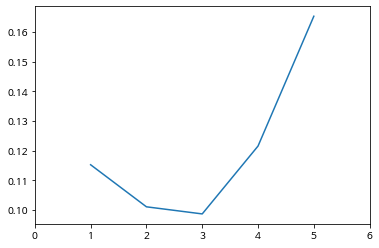

In [36]:
# degree 3이 가장 적당
# 차원이 증가함에 따라 계산량이 많아짐, 계산량이 많아지면 모델성능의 이득도 증가해야 함
# 차원이 증가할수록 모델에 대한 성능의 이득이 가장 많은 차원을 결정
plt.plot(evaluation_df["degree"], evaluation_df["mae"])
plt.xticks(list(range(len(evaluation_df)+2)))

plt.show()

# 선형회귀보다는 3차원으로 해석하는 것이 좋은데, 그렇게 해석하려고 하니 무엇이 문제인가?
# 선형회귀를 쓰자니 속도가 빠르고, 3차원으로 하자니 계산 양이 많아짐. -> 예측 속도에 대한 고민

#### <span style="color: #1E90FF">교차 검증</span>(Cross Validation)
> - xgboostRegressor, LGBMRegressor에 CrossValidation 라이브러리 및 기본적인 하이퍼파라미터 설정을 통해 MAE스코어 계산
> - sklearn KFold 라이브러리를 이용하여 동일한 조건으로 xgboostRegressor, LGBMRegressor에 대한 CrossValidation 진행한 MAE 스코어 계산
> - 두번의 BaseModel CrossValidation mae 스코어를 바탕으로 성능 개선 예정

In [37]:
def cal_xgb1(X,y):
            
    X_train, X_valid, y_train, y_valid = sep_xy(X,y)
    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    params = {'booster':'gbtree',
                'gamma':0,
                'learning_rate':0.05,
                'max_depth':5,
                'min_child_weight':1,
                'n_jobs':-1,
                'objective':'reg:squaredlogerror',
                'reg_alpha':0,
              'eval_metric' : 'mae',
             'random_state':42}

    xgb_cv = xgb.cv(
      num_boost_round=100,
      params = params,
      dtrain = dtrain,
      nfold=5,
      as_pandas = True
    )
    
    return xgb_cv

In [38]:
cal_xgb1(X_train, y_train)

,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,0.256211,0.000057,0.256212,0.000224
1,0.244318,0.000054,0.244320,0.000209
2,0.233508,0.000051,0.233512,0.000195
3,0.223617,0.000044,0.223622,0.000186
4,0.214546,0.000045,0.214553,0.000172
...,...,...,...,...
95,0.091983,0.000043,0.092085,0.000139
96,0.091932,0.000041,0.092035,0.000140
97,0.091880,0.000038,0.091982,0.000141
98,0.091830,0.000040,0.091933,0.000138


In [39]:
# eval_set 하이퍼파라미터를 사용하면 아래와 같이 결과를 출력합니다

def cal_xgb2(X,y):

    model = xgb.XGBRegressor(
        n_estimators=100,
        booster='gbtree',
        gamma=0,
        learning_rate=0.05,
        max_depth=5,
        min_child_weight=1,
        n_jobs=-1,
        objective='reg:squaredlogerror',
        # 주의: XGBRegressor는 sklearn mean_absolute_error 사용 (안하면 출력은 reg:squaredlogerror 값만 출력 됨)
        # xgb.cv 같은 경우 'mae'로 설정해야 됩니다.
        eval_metric=mean_absolute_error,
        reg_alpha=0,
        random_state=42)

    scores = []
    folds = KFold(n_splits=5)

    for train_idx, val_idx in folds.split(X, y):
        X_train = X.iloc[train_idx, :]
        y_train = y.iloc[train_idx]

        X_val = X.iloc[val_idx, :]
        y_val = y.iloc[val_idx]

        model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
        preds = model.predict(X_val)
        score = mean_absolute_error(y_val, preds)
        scores.append(score)
        
    return np.mean(scores)

In [40]:
cal_xgb2(X,y)

[0]	validation_0-rmsle:0.20636	validation_0-mean_absolute_error:0.25632
[1]	validation_0-rmsle:0.19694	validation_0-mean_absolute_error:0.24443
[2]	validation_0-rmsle:0.18838	validation_0-mean_absolute_error:0.23363
[3]	validation_0-rmsle:0.18059	validation_0-mean_absolute_error:0.22373
[4]	validation_0-rmsle:0.17347	validation_0-mean_absolute_error:0.21467
[5]	validation_0-rmsle:0.16695	validation_0-mean_absolute_error:0.20633
[6]	validation_0-rmsle:0.16096	validation_0-mean_absolute_error:0.19862
[7]	validation_0-rmsle:0.15545	validation_0-mean_absolute_error:0.19148
[8]	validation_0-rmsle:0.15038	validation_0-mean_absolute_error:0.18488
[9]	validation_0-rmsle:0.14569	validation_0-mean_absolute_error:0.17874
[10]	validation_0-rmsle:0.14138	validation_0-mean_absolute_error:0.17306
[11]	validation_0-rmsle:0.13740	validation_0-mean_absolute_error:0.16776
[12]	validation_0-rmsle:0.13375	validation_0-mean_absolute_error:0.16289
[13]	validation_0-rmsle:0.13037	validation_0-mean_absolute_er

[13]	validation_0-rmsle:0.13028	validation_0-mean_absolute_error:0.15819
[14]	validation_0-rmsle:0.12717	validation_0-mean_absolute_error:0.15396
[15]	validation_0-rmsle:0.12429	validation_0-mean_absolute_error:0.14999
[16]	validation_0-rmsle:0.12163	validation_0-mean_absolute_error:0.14628
[17]	validation_0-rmsle:0.11919	validation_0-mean_absolute_error:0.14284
[18]	validation_0-rmsle:0.11692	validation_0-mean_absolute_error:0.13960
[19]	validation_0-rmsle:0.11483	validation_0-mean_absolute_error:0.13661
[20]	validation_0-rmsle:0.11292	validation_0-mean_absolute_error:0.13382
[21]	validation_0-rmsle:0.11117	validation_0-mean_absolute_error:0.13123
[22]	validation_0-rmsle:0.10956	validation_0-mean_absolute_error:0.12881
[23]	validation_0-rmsle:0.10805	validation_0-mean_absolute_error:0.12651
[24]	validation_0-rmsle:0.10667	validation_0-mean_absolute_error:0.12439
[25]	validation_0-rmsle:0.10541	validation_0-mean_absolute_error:0.12243
[26]	validation_0-rmsle:0.10423	validation_0-mean_a

[26]	validation_0-rmsle:0.10422	validation_0-mean_absolute_error:0.12057
[27]	validation_0-rmsle:0.10315	validation_0-mean_absolute_error:0.11885
[28]	validation_0-rmsle:0.10215	validation_0-mean_absolute_error:0.11722
[29]	validation_0-rmsle:0.10124	validation_0-mean_absolute_error:0.11570
[30]	validation_0-rmsle:0.10041	validation_0-mean_absolute_error:0.11428
[31]	validation_0-rmsle:0.09963	validation_0-mean_absolute_error:0.11296
[32]	validation_0-rmsle:0.09892	validation_0-mean_absolute_error:0.11174
[33]	validation_0-rmsle:0.09827	validation_0-mean_absolute_error:0.11060
[34]	validation_0-rmsle:0.09766	validation_0-mean_absolute_error:0.10951
[35]	validation_0-rmsle:0.09710	validation_0-mean_absolute_error:0.10850
[36]	validation_0-rmsle:0.09659	validation_0-mean_absolute_error:0.10758
[37]	validation_0-rmsle:0.09613	validation_0-mean_absolute_error:0.10671
[38]	validation_0-rmsle:0.09570	validation_0-mean_absolute_error:0.10589
[39]	validation_0-rmsle:0.09527	validation_0-mean_a

[39]	validation_0-rmsle:0.09521	validation_0-mean_absolute_error:0.10510
[40]	validation_0-rmsle:0.09484	validation_0-mean_absolute_error:0.10438
[41]	validation_0-rmsle:0.09447	validation_0-mean_absolute_error:0.10367
[42]	validation_0-rmsle:0.09415	validation_0-mean_absolute_error:0.10304
[43]	validation_0-rmsle:0.09385	validation_0-mean_absolute_error:0.10242
[44]	validation_0-rmsle:0.09357	validation_0-mean_absolute_error:0.10184
[45]	validation_0-rmsle:0.09331	validation_0-mean_absolute_error:0.10132
[46]	validation_0-rmsle:0.09307	validation_0-mean_absolute_error:0.10081
[47]	validation_0-rmsle:0.09286	validation_0-mean_absolute_error:0.10035
[48]	validation_0-rmsle:0.09266	validation_0-mean_absolute_error:0.09993
[49]	validation_0-rmsle:0.09247	validation_0-mean_absolute_error:0.09951
[50]	validation_0-rmsle:0.09227	validation_0-mean_absolute_error:0.09907
[51]	validation_0-rmsle:0.09209	validation_0-mean_absolute_error:0.09868
[52]	validation_0-rmsle:0.09193	validation_0-mean_a

[52]	validation_0-rmsle:0.09195	validation_0-mean_absolute_error:0.09835
[53]	validation_0-rmsle:0.09180	validation_0-mean_absolute_error:0.09801
[54]	validation_0-rmsle:0.09165	validation_0-mean_absolute_error:0.09767
[55]	validation_0-rmsle:0.09152	validation_0-mean_absolute_error:0.09735
[56]	validation_0-rmsle:0.09140	validation_0-mean_absolute_error:0.09708
[57]	validation_0-rmsle:0.09129	validation_0-mean_absolute_error:0.09681
[58]	validation_0-rmsle:0.09118	validation_0-mean_absolute_error:0.09656
[59]	validation_0-rmsle:0.09108	validation_0-mean_absolute_error:0.09629
[60]	validation_0-rmsle:0.09097	validation_0-mean_absolute_error:0.09605
[61]	validation_0-rmsle:0.09088	validation_0-mean_absolute_error:0.09583
[62]	validation_0-rmsle:0.09079	validation_0-mean_absolute_error:0.09561
[63]	validation_0-rmsle:0.09071	validation_0-mean_absolute_error:0.09543
[64]	validation_0-rmsle:0.09064	validation_0-mean_absolute_error:0.09525
[65]	validation_0-rmsle:0.09057	validation_0-mean_a

0.09189336095186622

In [41]:
def cal_LGBM1(X,y):
    
    X_train, X_valid, y_train, y_valid = sep_xy(X,y)
    
    dtrain = lgb.Dataset(data=X_train, label=y_train)
    params = {'objective': 'regression', # 회귀
            'verbose': 0,
            'max_depth': 5,
            'learning_rate': 0.05,
            'n_estimators': 100,
            'min_child_samples': 5,
            'subsample': 0.4}

    lgb_cv = lgb.cv(
        params,
        dtrain,
        stratified=False,
        num_boost_round=100,
        nfold = 5)
    
    return lgb_cv

In [42]:
cal_LGBM1(X, y)

C:\Users\brown\miniforge3\envs\csw\lib\site-packages\lightgbm\engine.py:573: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.109736 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_lea

{'l2-mean': [0.08729528333728782,
  0.08075933281007686,
  0.0748464703145087,
  0.06950554366245904,
  0.06467044021109367,
  0.06029352355558386,
  0.056333672501107226,
  0.052746542414213046,
  0.04950433223375889,
  0.046564973204757526,
  0.04390294012865433,
  0.041489860991766124,
  0.0393080597179819,
  0.03732725983174747,
  0.03553036449104435,
  0.03390003361043849,
  0.032419898700968244,
  0.031075698438763046,
  0.02985680916801378,
  0.02874879006784038,
  0.027736878283850963,
  0.026819372241298454,
  0.025986278397750612,
  0.02522352666533729,
  0.024534830658472957,
  0.023904158770257384,
  0.02332948886235032,
  0.022807850680398933,
  0.0223315757309409,
  0.02189427475799705,
  0.021498591988749795,
  0.021131742479951643,
  0.020799482644968195,
  0.020491724670489816,
  0.020211873040011468,
  0.01995648187123798,
  0.019722145712008823,
  0.01950516501045482,
  0.019305883551001296,
  0.019120463496368444,
  0.01895173429471879,
  0.018794388780928727,
  0.0

In [43]:
def cal_LGBM2(X,y):

    model = lgb.LGBMRegressor(
        objective = 'regression',
        verbose = 0,
        max_depth = 5,
        learning_rate= 0.05,
        n_estimators = 100,
        min_child_samples= 5,
        subsample = 0.4)

    scores = []
    folds = KFold(n_splits=5)

    for train_idx, val_idx in folds.split(X, y):
        X_train = X.iloc[train_idx, :]
        y_train = y.iloc[train_idx]

        X_val = X.iloc[val_idx, :]
        y_val = y.iloc[val_idx]

        model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
        preds = model.predict(X_val)
        score = mean_absolute_error(y_val, preds)
        scores.append(score)
        
    return np.mean(scores)

In [44]:
cal_LGBM2(X,y)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.207621 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's l2: 0.0873202
[2]	valid_0's l2: 0.0807853
[3]	valid_0's l2: 0.0748674
[4]	valid_0's l2: 0.0695286
[5]	valid_0's l2: 0.0646943
[6]	valid_0's l2: 0.0603154
[7]	valid_0's l2: 0.0563434
[8]	valid_0's l2: 0.0527616
[9]	valid_0's l2: 0.0495133
[10]	valid_0's l2: 0.0465743
[11]	valid_0's l2: 0.0439133
[12]	valid_0's l2: 0.0414867
[13]	valid_0's l2: 0.0392994
[14]	valid_0'

[17]	valid_0's l2: 0.0324122
[18]	valid_0's l2: 0.0310758
[19]	valid_0's l2: 0.0298559
[20]	valid_0's l2: 0.0287387
[21]	valid_0's l2: 0.0277351
[22]	valid_0's l2: 0.0268183
[23]	valid_0's l2: 0.0259924
[24]	valid_0's l2: 0.0252203
[25]	valid_0's l2: 0.0245317
[26]	valid_0's l2: 0.0238922
[27]	valid_0's l2: 0.023321
[28]	valid_0's l2: 0.0228038
[29]	valid_0's l2: 0.0223224
[30]	valid_0's l2: 0.021888
[31]	valid_0's l2: 0.0214975
[32]	valid_0's l2: 0.0211321
[33]	valid_0's l2: 0.0207979
[34]	valid_0's l2: 0.020492
[35]	valid_0's l2: 0.0202167
[36]	valid_0's l2: 0.0199594
[37]	valid_0's l2: 0.0197275
[38]	valid_0's l2: 0.0195104
[39]	valid_0's l2: 0.0193097
[40]	valid_0's l2: 0.0191308
[41]	valid_0's l2: 0.0189621
[42]	valid_0's l2: 0.0188068
[43]	valid_0's l2: 0.0186634
[44]	valid_0's l2: 0.0185272
[45]	valid_0's l2: 0.0184058
[46]	valid_0's l2: 0.0182929
[47]	valid_0's l2: 0.0181871
[48]	valid_0's l2: 0.0180901
[49]	valid_0's l2: 0.0179931
[50]	valid_0's l2: 0.0179094
[51]	valid_0's l2

[59]	valid_0's l2: 0.0173537
[60]	valid_0's l2: 0.0173084
[61]	valid_0's l2: 0.0172673
[62]	valid_0's l2: 0.017227
[63]	valid_0's l2: 0.0171886
[64]	valid_0's l2: 0.0171541
[65]	valid_0's l2: 0.0171226
[66]	valid_0's l2: 0.0170836
[67]	valid_0's l2: 0.0170541
[68]	valid_0's l2: 0.0170239
[69]	valid_0's l2: 0.016995
[70]	valid_0's l2: 0.0169731
[71]	valid_0's l2: 0.01695
[72]	valid_0's l2: 0.016929
[73]	valid_0's l2: 0.0169079
[74]	valid_0's l2: 0.0168881
[75]	valid_0's l2: 0.016863
[76]	valid_0's l2: 0.016846
[77]	valid_0's l2: 0.0168234
[78]	valid_0's l2: 0.0168067
[79]	valid_0's l2: 0.0167907
[80]	valid_0's l2: 0.0167745
[81]	valid_0's l2: 0.0167578
[82]	valid_0's l2: 0.0167449
[83]	valid_0's l2: 0.0167287
[84]	valid_0's l2: 0.0167143
[85]	valid_0's l2: 0.0167026
[86]	valid_0's l2: 0.0166913
[87]	valid_0's l2: 0.0166786
[88]	valid_0's l2: 0.0166689
[89]	valid_0's l2: 0.0166571
[90]	valid_0's l2: 0.0166469
[91]	valid_0's l2: 0.0166358
[92]	valid_0's l2: 0.0166229
[93]	valid_0's l2: 0.

0.09281670342676496